In [89]:
import tensorflow as tf
import numpy as np
import IPython.display as display

In [90]:
# The following functions can be used to convert a value to a type compatible
# with tf.train.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

## tf.train.Example 메세지 만들기
---
1. 각 관측 값 내에서 각 값은 위의 함수 중 하나를 사용하여 3가지 호환 유형 중 하나를 포함하는 ```tf.train.Feature```로 변환되어야한다.
2. feature 이름 문자열 #1 에서 생성된 인코딩 된 feature value으로 맵(사전)을 만든다.
3. 2단계에서 생성 된 map은 ```Feature 메시지```로 변환된다.
---
- 여기선 numpy를 사용하여 Dataset을 생성한다
- 4가지 feature이 있다.
    1. bool값 => true, false
    2. 0부터 5까지 랜덤한 int형 숫자
    3. int feature를 인덱스로 사용하여 문자열 테이블에서 생성된 string feature
    4. float feature


In [91]:
from glob import glob
import os

In [92]:
food_lst = os.listdir('/content/drive/Shared drives/GOFOODA/data/food30')
food_lst.sort()
image_label = {}

for idx, name in enumerate(food_lst) :
    image_label[name] = idx

image_label

{'갈비구이': 0,
 '갈비탕': 1,
 '갈치구이': 2,
 '갈치조림': 3,
 '감자탕': 4,
 '계란말이': 5,
 '고추튀김': 6,
 '곰탕_설렁탕': 7,
 '곱창전골': 8,
 '김밥': 9,
 '김치볶음밥': 10,
 '김치전': 11,
 '김치찌개': 12,
 '닭볶음탕': 13,
 '된장찌개': 14,
 '만두': 15,
 '비빔밥': 16,
 '삼겹살': 17,
 '새우볶음밥': 18,
 '생선전': 19,
 '소세지볶음': 20,
 '양념치킨': 21,
 '육개장': 22,
 '육회': 23,
 '제육볶음': 24,
 '짬뽕': 25,
 '찜닭': 26,
 '파전': 27,
 '피자': 28,
 '후라이드치킨': 29}

In [93]:
image_paths = glob('/content/drive/Shared drives/GOFOODA/data/food30/*/*')
image_paths[:5], len(image_paths)

(['/content/drive/Shared drives/GOFOODA/data/food30/육개장/Img_020_0773.jpg',
  '/content/drive/Shared drives/GOFOODA/data/food30/육개장/Img_020_0987.jpg',
  '/content/drive/Shared drives/GOFOODA/data/food30/육개장/Img_020_0723.jpg',
  '/content/drive/Shared drives/GOFOODA/data/food30/육개장/Img_020_0402.jpg',
  '/content/drive/Shared drives/GOFOODA/data/food30/육개장/Img_020_0240.jpg'],
 28476)

In [94]:
image_paths[0].split('/')[-2]

'육개장'

In [95]:
from tqdm.notebook import tqdm

In [96]:
tfr_train_dir = '/content/drive/Shared drives/GOFOODA/data/food_data.tfr'
writer_train = tf.io.TFRecordWriter(tfr_train_dir)

In [97]:
# The following functions can be used to convert a value to a type compatible
# with tf.train.Example.

def _bytes_feature(value):
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [98]:
image_paths[:5]

['/content/drive/Shared drives/GOFOODA/data/food30/육개장/Img_020_0773.jpg',
 '/content/drive/Shared drives/GOFOODA/data/food30/육개장/Img_020_0987.jpg',
 '/content/drive/Shared drives/GOFOODA/data/food30/육개장/Img_020_0723.jpg',
 '/content/drive/Shared drives/GOFOODA/data/food30/육개장/Img_020_0402.jpg',
 '/content/drive/Shared drives/GOFOODA/data/food30/육개장/Img_020_0240.jpg']

In [99]:
n_train = 0
for path in tqdm(image_paths):
    # image = tf.io.read_file(path)
    # image = tf.image.decode_jpeg(image)
    # image = image.resize((IMG_SIZE, IMG_SIZE))
    image = open(path, 'rb').read()

    class_name = path.split('/')[-2]
    label = image_label[class_name]

    feature = {
        'image' : _bytes_feature(image),
        'label' : _int64_feature(label),
    }

    example = tf.train.Example(features=tf.train.Features(feature=feature))
    writer_train.write(example.SerializeToString())
    n_train+=1

writer_train.close()
print(n_train)


28476


In [100]:
raw_image_dataset = tf.data.TFRecordDataset(tfr_train_dir)

# Create a dictionary describing the features.
image_feature_description = {
    'image' : tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.int64),
}

def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {image: (), label: ()}, types: {image: tf.string, label: tf.int64}>

In [109]:
parsed_image_dataset = parsed_image_dataset.shuffle(20000)

tf.Tensor(12, shape=(), dtype=int64)


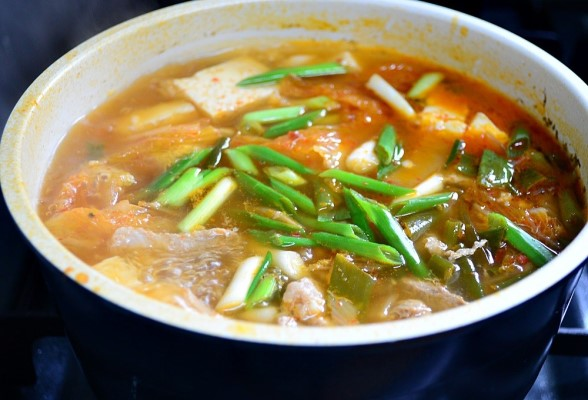

tf.Tensor(0, shape=(), dtype=int64)


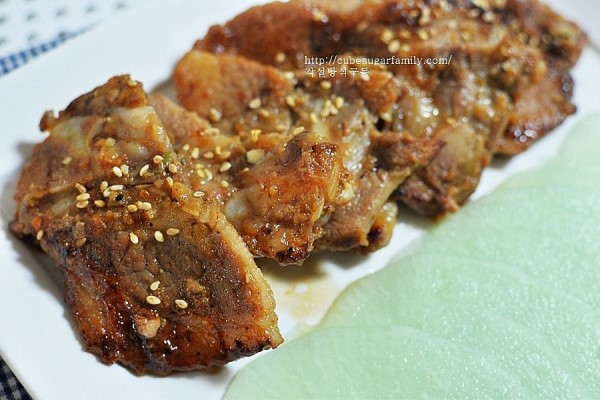

tf.Tensor(15, shape=(), dtype=int64)


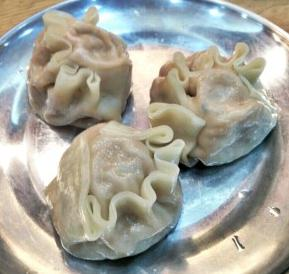

tf.Tensor(15, shape=(), dtype=int64)


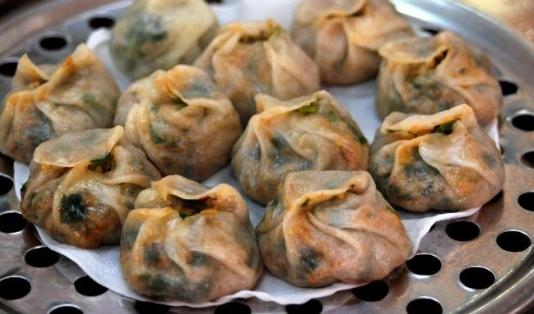

tf.Tensor(2, shape=(), dtype=int64)


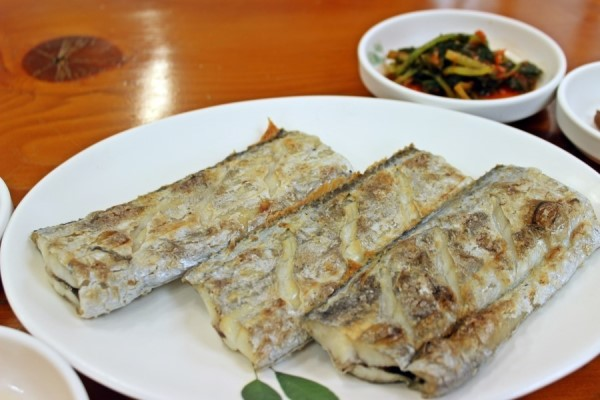

In [111]:
for image_features in parsed_image_dataset.take(5):
    print(image_features['label'])
    image_raw = image_features['image'].numpy()
    display.display(display.Image(data=image_raw))